In [4]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.optim as optim

# Pregunta 1
---

---
**Usar un data set de su elección, NO CIFAR10, con el fin de crear TRES clasificadores dicótomicos. Capases de recibir datos o imágenes(URL) externos. (se comprobara con datos su efectividad)**






In [19]:
data_path = 'data/'
full_data_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

full_validation_set = datasets.CIFAR100(data_path, train=True, download=True, transform= transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified
Files already downloaded and verified


In [20]:
size = 3
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pear
oak_tree
lizard


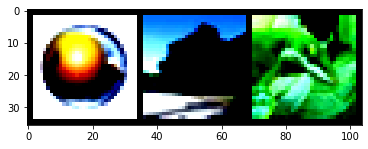

In [21]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])


In [22]:
#Especificamos las clases que queremos usar.
class_names = ['bridge', 'bus','butterfly']
label_map = {12:0, 13:1, 14:2}
data_set = [(img, label_map[label]) for img, label in full_data_set if label in [12, 13, 14]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [12, 13, 14]]


In [24]:
img, label = data_set[200]
img.shape

torch.Size([3, 32, 32])

In [25]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

print(softmax(x))
print(softmax(x).sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [26]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32,512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'bridge'

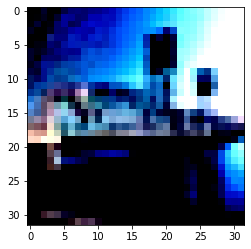

In [35]:
img, label = data_set[501]
plt.imshow(img.permute(1,2,0))
#Me imprime un bus, que es el que esta en la posición 500
class_names[label]

In [ ]:
_, index = torch.max(out, dim=1)
#Me imprime que el bus es un bus
print('->', class_names[label],'model:',class_names[index])

-> bridge model: bus


In [ ]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4619, 0.5381]], grad_fn=<SoftmaxBackward>)

In [ ]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
    )
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'butterfly'

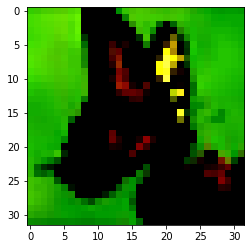

In [ ]:
img, label = data_set[120]
plt.imshow(img.permute(1,2,0))
class_names[label]

In [ ]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->', class_names[label], 'model:',class_names[index])

tensor([[0.2977, 0.7023]], grad_fn=<SoftmaxBackward>)
-> butterfly model: bus


In [60]:
model = nn.Sequential(
    nn.Linear(3 * 32* 32, 512),
    nn.Tanh(),
    nn.Linear(512, 3),
    nn.LogSoftmax(dim=1)
    )
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5
for epoch in range (n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.075929
Epoch: 1, Loss: 0.010655
Epoch: 2, Loss: 0.002692
Epoch: 3, Loss: 0.000009
Epoch: 4, Loss: 0.000811


In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 0.720667


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  bridge  model: bridge


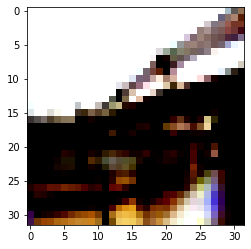

In [ ]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:', class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [61]:
"""Capaz de recibir imagenes externas"""
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072,1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 3)
    )
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 100

for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0],-1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 99, Loss: 0.003441


In [ ]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())
print("Accucacy: %f" % (correct / total))

Accucacy: 1.000000


In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad ==True])

3836163

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correct bridge:  model: bridge


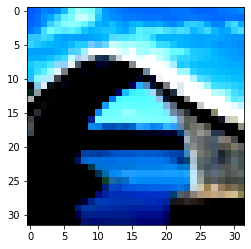

In [58]:
#El clasificador acierta me dice que es un bridge.
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Gaoliang_Bridge.JPG/1200px-Gaoliang_Bridge.JPG'
image = request.urlretrieve(url, 'test1.jpg')
img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(45),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.4915, 0.4823, 0.4468]
                                 )
])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out,dim=1)
print('Correct bridge: ','model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

# Pregunta 2

---

---
**Utilizar una inteligencia artificial entrenada de clasificación, e incorporar 3 datos que los pueda clasificar y 1 datos que no pueda clasificar:Especificar los resultados de su comprobación. No usar inception**





In [ ]:
#Utilizamos el modelo Alexnet
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


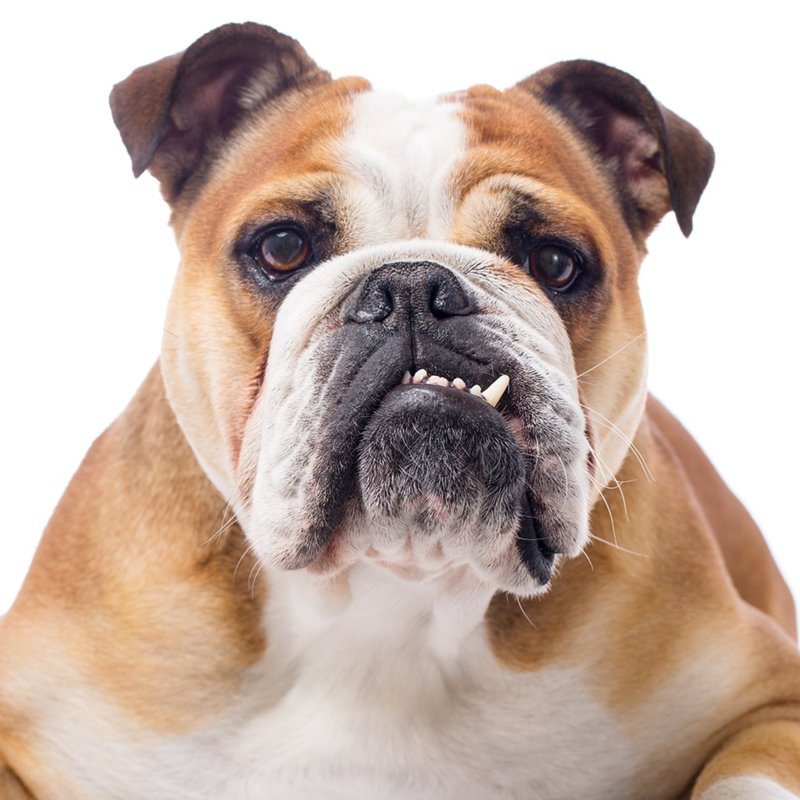

In [ ]:
#importamos las urls de las imagenes a clasificar
urls=[
      "https://www.nationalgeographic.com.es/medio/2019/09/09/bull-dog-ingles_043b09e1_800x800.jpg",
      "https://static.vix.com/es/sites/default/files/styles/4x3/public/btg/curiosidades.batanga.com/files/Quien-invento-el-telefono-3.jpg",
      "https://estaticos.muyinteresante.es/media/cache/1140x_thumb/uploads/images/gallery/594a1ced5bafe85dfd3c9869/gato-romano_0.jpg",
      "https://www.latercera.com/resizer/ByGUZcUT73RDkJpOevrAY6-z_aM=/900x600/smart/cloudfront-us-east-1.images.arcpublishing.com/copesa/4QEXSUD65VCUNJWMSOPZQXXYQI.jpg"
]
image = request.urlretrieve(urls[0], "test.jpg")
image1 = request.urlretrieve(urls[1], "test1.jpg")
image2 = request.urlretrieve(urls[2], "test2.jpg")
image3 = request.urlretrieve(urls[3], "test3.jpg")
img=Image.open(image[0])
img1=Image.open(image1[0])
img2=Image.open(image2[0])
img3=Image.open(image3[0])
#Muestro las imagenes
img

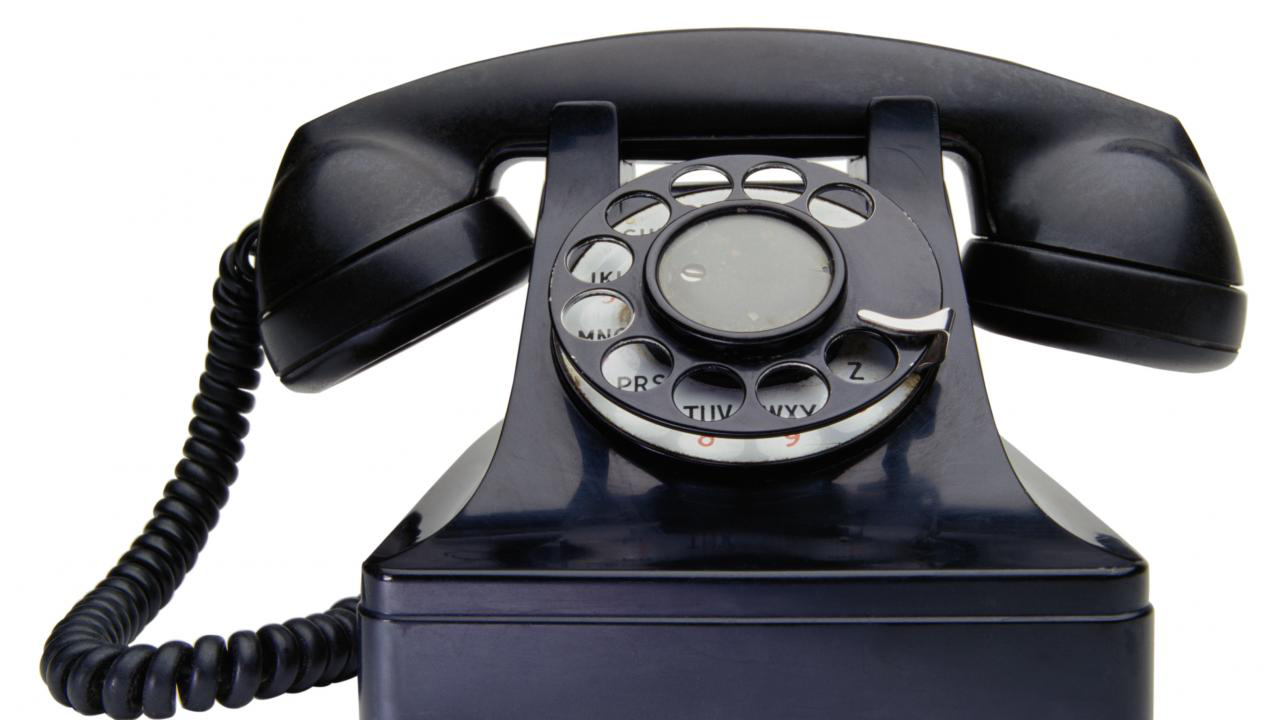

In [ ]:
img1

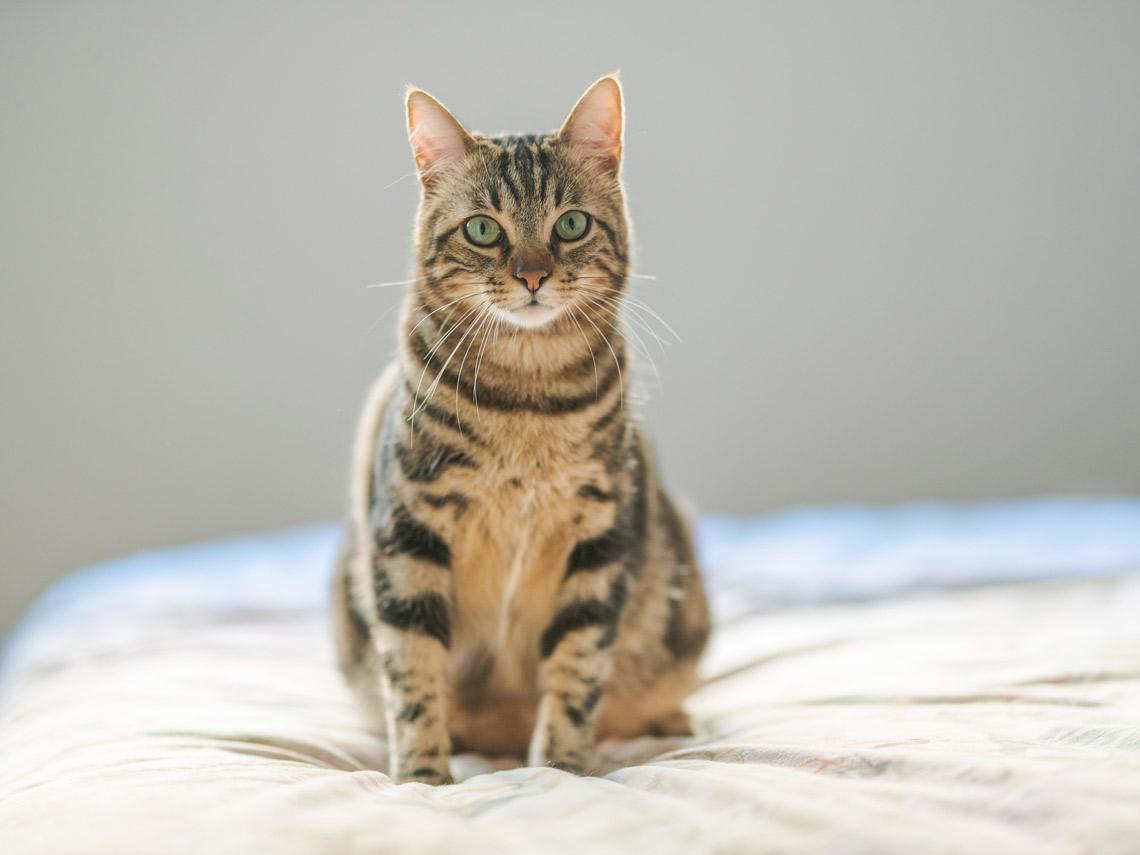

In [ ]:
img2

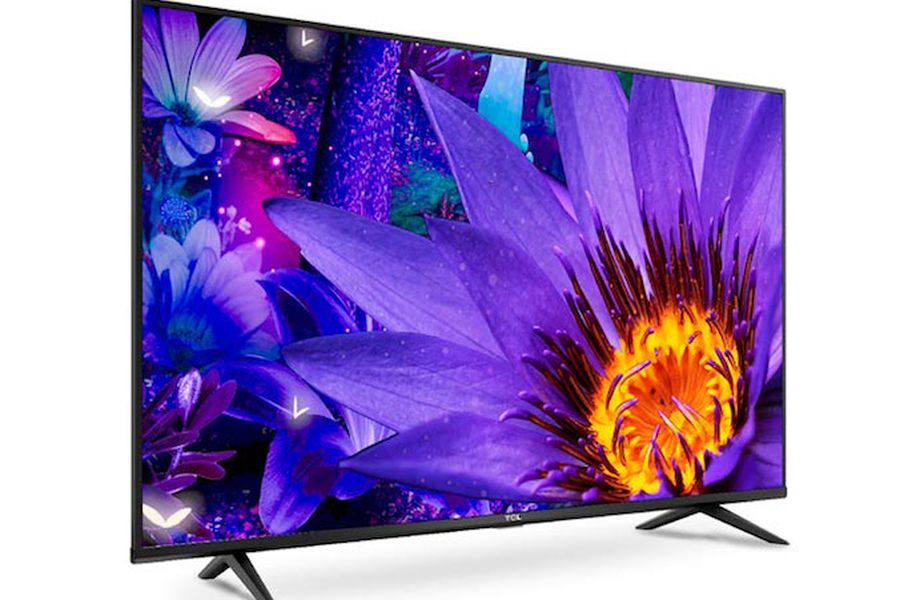

In [ ]:
img3

In [ ]:
preprocess = transforms.Compose([
  transforms.Resize(399),
  transforms.CenterCrop(299),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485,0.456, 0.406],
      std=[0.229, 0.224, 0.255]
  )                  
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


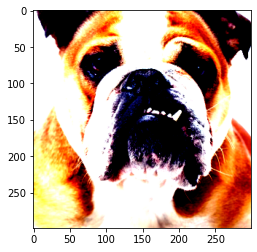

In [ ]:
img_t = preprocess(img)
img_t1 = preprocess(img1)
img_t2 = preprocess(img2)
img_t3 = preprocess(img3)

batch = torch.unsqueeze(img_t, 0)
batch1 = torch.unsqueeze(img_t1, 0)
batch2 = torch.unsqueeze(img_t2, 0)
batch3 = torch.unsqueeze(img_t3, 0)

plt.imshow(img_t.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


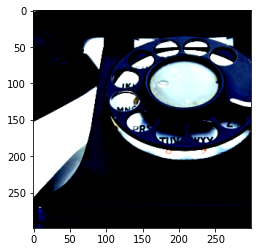

In [ ]:
plt.imshow(img_t1.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


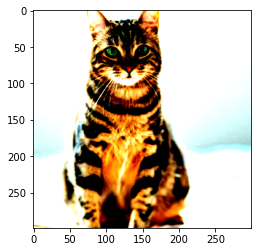

In [ ]:
plt.imshow(img_t2.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


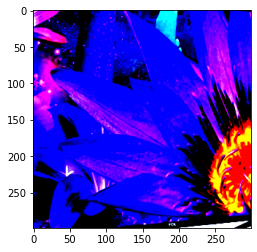

In [ ]:
plt.imshow(img_t3.permute(1,2,0))

In [ ]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
out = alexnet(batch)
out1 = alexnet(batch1)
out2 = alexnet(batch2)
out3 = alexnet(batch3)
out

tensor([[-1.8436e+00, -2.2583e+00, -2.6040e+00, -2.5725e+00, -5.1337e+00,
         -2.2520e+00, -3.2147e+00, -5.2893e-01, -1.3808e+00, -3.5639e+00,
          2.7054e+00, -3.9516e+00, -5.9282e+00, -4.1311e+00, -3.3366e+00,
         -7.7771e-01, -3.5577e+00, -2.9312e+00, -4.2745e-01, -3.3360e+00,
         -3.6578e+00, -4.6679e+00, -6.5645e+00,  6.7157e-01,  8.4930e-01,
         -3.9767e-01, -7.1972e-01, -1.5286e+00, -2.4522e+00, -3.5601e+00,
         -2.2769e+00, -1.0634e+00,  7.3985e-01,  1.5917e+00,  2.6193e+00,
          2.3436e+00,  4.8681e+00,  1.4513e+00,  2.4797e+00, -3.7826e+00,
         -1.8724e+00, -2.8631e+00, -2.3068e+00, -2.8851e+00, -2.5209e+00,
          1.4901e+00, -2.9149e+00, -9.3713e-01, -1.4354e+00, -3.0318e+00,
         -2.8870e+00, -2.3731e+00, -9.9097e-01, -7.8495e-01,  1.3020e+00,
         -2.3448e+00,  1.6624e+00, -2.1566e+00, -1.6013e+00, -7.7758e-01,
         -1.9390e-01,  4.5087e-01, -6.3738e-01,  6.0256e-01, -2.7843e+00,
          3.0874e-02,  2.0064e+00, -1.

In [ ]:
request.urlretrieve("https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt","labels.txt")
with open("labels.txt") as f:
  labels = [line.strip() for line in f.readlines()]

In [ ]:
out

tensor([[-1.8436e+00, -2.2583e+00, -2.6040e+00, -2.5725e+00, -5.1337e+00,
         -2.2520e+00, -3.2147e+00, -5.2893e-01, -1.3808e+00, -3.5639e+00,
          2.7054e+00, -3.9516e+00, -5.9282e+00, -4.1311e+00, -3.3366e+00,
         -7.7771e-01, -3.5577e+00, -2.9312e+00, -4.2745e-01, -3.3360e+00,
         -3.6578e+00, -4.6679e+00, -6.5645e+00,  6.7157e-01,  8.4930e-01,
         -3.9767e-01, -7.1972e-01, -1.5286e+00, -2.4522e+00, -3.5601e+00,
         -2.2769e+00, -1.0634e+00,  7.3985e-01,  1.5917e+00,  2.6193e+00,
          2.3436e+00,  4.8681e+00,  1.4513e+00,  2.4797e+00, -3.7826e+00,
         -1.8724e+00, -2.8631e+00, -2.3068e+00, -2.8851e+00, -2.5209e+00,
          1.4901e+00, -2.9149e+00, -9.3713e-01, -1.4354e+00, -3.0318e+00,
         -2.8870e+00, -2.3731e+00, -9.9097e-01, -7.8495e-01,  1.3020e+00,
         -2.3448e+00,  1.6624e+00, -2.1566e+00, -1.6013e+00, -7.7758e-01,
         -1.9390e-01,  4.5087e-01, -6.3738e-01,  6.0256e-01, -2.7843e+00,
          3.0874e-02,  2.0064e+00, -1.

In [ ]:
_, index = torch.max(out, 1)
_, index1 = torch.max(out1, 1)
_, index2 = torch.max(out2, 1)
_, index3 = torch.max(out3, 1)

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [ ]:
#Si reconoce, me dice que es un perro de raza boxer
labels[index[0]], percentage[index[0]].item()

('boxer', 70.2339859008789)

In [ ]:
#Si reconoce, me dice que es un telefono
labels[index1[0]], percentage[index1[0]].item()

('dial telephone, dial phone', 2.4102910174406134e-06)

In [ ]:
#Si reconoce, me dice que es un gato
labels[index2[0]], percentage[index2[0]].item()

('Egyptian cat', 4.215020817355253e-05)

In [ ]:
#No reconoce, me dice que es un stage pero claramente se ve que es un televisor.
labels[index3[0]], percentage[index3[0]].item()

('stage', 5.022401978749258e-07)

# Pregunta 3

---

---

**1.- Crear 2 Array con 200 datos aleatorios entre el 1 - 2000.Analizar esos datos y realizar una regresión lineal con dichos datos.**



In [ ]:
import torch
import numpy as np
#modulo de redes neuronales
import torch.nn as nn
#modulo de optimizaciones
import torch.optim as optim
#biblioteca de ayuda para graficar
import matplotlib.pyplot as plt

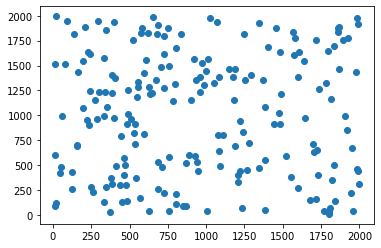

In [ ]:
tensor_a = torch.rand(200)*2000
tensor_b = torch.rand(200)*2000
plt.scatter(tensor_a, tensor_b)

In [ ]:
tensorA_array = np.array(tensor_a).reshape(-1,1)
tensorB_array = np.array(tensor_b).reshape(-1,1)
tensorA_array, tensorB_array.size

(array([[1023.0218   ],
        [1961.5214   ],
        [ 972.76666  ],
        [ 351.7314   ],
        [1860.1494   ],
        [1637.214    ],
        [  16.237617 ],
        [ 469.40875  ],
        [ 605.0885   ],
        [1862.7833   ],
        [1148.2788   ],
        [ 440.79077  ],
        [ 413.12265  ],
        [ 533.3153   ],
        [1577.6342   ],
        [ 466.3936   ],
        [1209.8447   ],
        [ 543.421    ],
        [ 122.34771  ],
        [ 925.7846   ],
        [1370.5449   ],
        [ 594.3866   ],
        [ 870.2554   ],
        [1982.7244   ],
        [1715.3273   ],
        [  12.2077465],
        [1735.8066   ],
        [ 676.2454   ],
        [ 888.26263  ],
        [ 946.2283   ],
        [1952.5209   ],
        [ 273.11612  ],
        [ 594.97656  ],
        [ 466.3745   ],
        [ 483.73593  ],
        [1078.3928   ],
        [  79.114914 ],
        [ 521.8508   ],
        [1189.2349   ],
        [ 157.84598  ],
        [ 484.32623  ],
        [1346.11

In [ ]:
tensorA = torch.from_numpy(tensorA_array).float().requires_grad_(True)
tensorB = torch.from_numpy(tensorB_array).float()
tensorA,tensorB

(tensor([[1023.0218],
         [1961.5214],
         [ 972.7667],
         [ 351.7314],
         [1860.1494],
         [1637.2140],
         [  16.2376],
         [ 469.4088],
         [ 605.0885],
         [1862.7833],
         [1148.2788],
         [ 440.7908],
         [ 413.1227],
         [ 533.3153],
         [1577.6342],
         [ 466.3936],
         [1209.8447],
         [ 543.4210],
         [ 122.3477],
         [ 925.7846],
         [1370.5449],
         [ 594.3866],
         [ 870.2554],
         [1982.7244],
         [1715.3273],
         [  12.2077],
         [1735.8066],
         [ 676.2454],
         [ 888.2626],
         [ 946.2283],
         [1952.5209],
         [ 273.1161],
         [ 594.9766],
         [ 466.3745],
         [ 483.7359],
         [1078.3928],
         [  79.1149],
         [ 521.8508],
         [1189.2349],
         [ 157.8460],
         [ 484.3262],
         [1346.1155],
         [ 630.6394],
         [ 726.8643],
         [ 382.7000],
         [

nan


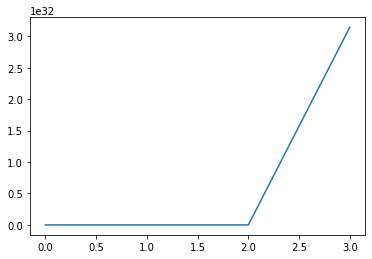

In [ ]:
model= nn.Linear(1, 1)
loss_function = nn.MSELoss()
optimizer= optim.SGD(model.parameters(), lr=0.0112)
losses=[]
iterations = 4000
for i in range(iterations):
  pred = model(tensorA)
  loss= loss_function(pred, tensorB)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations),losses)


In [ ]:
x= torch.Tensor([[4.0]])
p= model(x)
p

tensor([[nan]], grad_fn=<AddmmBackward>)

**2.- De un grupo de 360 datos aleatorios, que se encuentra centrados con un factor (x7) y luego separados entre si con un factor (X8).Separar los datos en grupos de color Verde y Amarillo Realizar una regresión logística con dichos datos.Graficar la linea de decision boundary**

In [ ]:
n = 360

h = n//2

dimen = 2

data = np.random.rand(n, dimen)*10
data

array([[9.48602317e+00, 1.52037009e+00],
       [1.48799063e+00, 3.13034798e+00],
       [9.39011859e+00, 4.42778344e+00],
       [2.89404799e+00, 9.70533080e+00],
       [6.04765628e+00, 1.70179606e-01],
       [5.64806375e+00, 7.50627224e+00],
       [9.22324408e+00, 6.91026264e+00],
       [8.72641810e+00, 5.33312966e-01],
       [6.02220551e+00, 8.43903209e+00],
       [2.92792838e+00, 6.38664293e+00],
       [2.94350484e-01, 4.80296874e+00],
       [3.43597626e+00, 5.56803704e+00],
       [2.47663838e+00, 4.32055766e+00],
       [3.75240222e-01, 6.45573560e+00],
       [5.24628968e+00, 4.38362112e+00],
       [1.27605992e+00, 7.79796217e+00],
       [2.87069957e+00, 8.90427588e+00],
       [1.66700486e+00, 8.87316628e-01],
       [1.79111331e+00, 7.64066059e-03],
       [3.61988580e+00, 6.23591965e-02],
       [6.38528475e+00, 4.35594863e+00],
       [1.12688650e+00, 9.67756662e+00],
       [7.23775115e+00, 4.07560625e+00],
       [4.30685471e+00, 5.50975259e+00],
       [4.856085

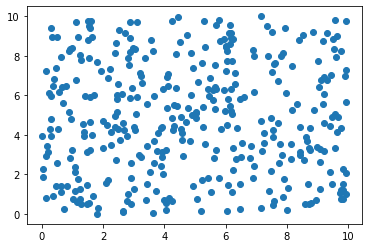

In [ ]:
plt.scatter(data[:,0],data[:,1])

In [ ]:
data[:h,:] = data[:h, :] -5* np.ones((h, dimen))

In [ ]:
data[h:,:] = data[h:, :] +5* np.ones((h, dimen))

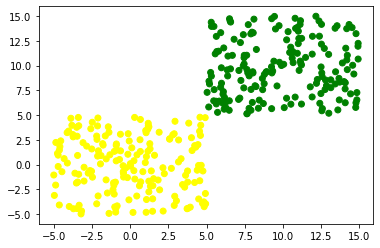

In [ ]:
colors = ['yellow', 'green']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)

plt.scatter(data[:,0], data[:, 1], c = color)

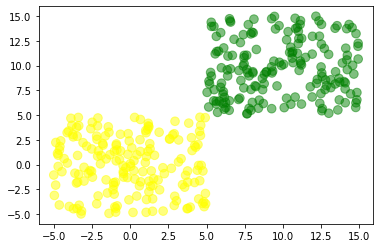

In [ ]:
plt.scatter(data[:,0], data[:, 1], c = color, s = 75, alpha=0.5)

In [ ]:
target = np.array ([0]*h +[1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([360, 2]), torch.Size([360, 1]))

tensor(0.0575, grad_fn=<BinaryCrossEntropyBackward>)

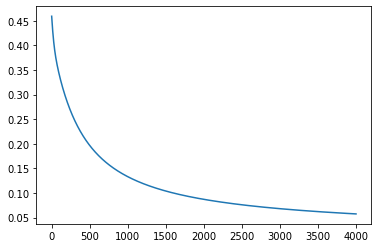

In [ ]:
model = nn.Sequential(
           nn.Linear(2,1),
           nn.Sigmoid()
        )

loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []

iterations = 4000

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [ ]:
yellow = torch.Tensor([[0,0]])
prediction = model(yellow)
print(prediction)

prediction = model(yellow).data[0][0] > 0.5
print(colors[prediction])

green = torch.Tensor([[6,6]])
prediction = model(green)
print(prediction)

prediction = model(green).data[0][0] > 0.5
print(color)

tensor([[0.0273]], grad_fn=<SigmoidBackward>)
yellow
tensor([[0.8492]], grad_fn=<SigmoidBackward>)
['yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow'
 'yellow' 'yellow' 'yello

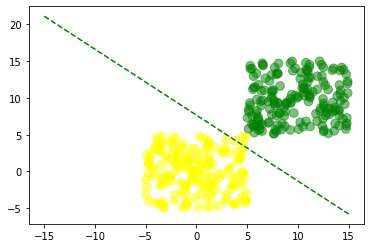

In [ ]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.5)

x_axis = np.linspace(-15,15,n)

y_axis = -(w1[0]+ x_axis*w0[0][0]) / w0[0][1]

plt.plot(x_axis, y_axis, 'g--')